Trabajo practico 1: Pandas
Bautista Boeri
110898

In [ ]:
# Instalar gdown (si no está instalado)
!pip install gdown

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Descargar todos los archivos de la carpeta pública
carpeta_drive = "https://drive.google.com/drive/folders/1UXAAJ-XgEe5F89U03eNdQ5NBcwzP78A2"
!gdown --folder "{carpeta_drive}"

# Detectar automáticamente la carpeta creada
contenido = os.listdir("/content")
carpeta_descargada = [c for c in contenido if os.path.isdir(os.path.join("/content", c))][0]

ruta_guardado = "/content/datasets_pkl"

# Listar archivos .pkl en esa carpeta
archivos_pkl = [f for f in os.listdir(ruta_guardado) if f.endswith(".pkl")]

# Crear diccionario {nombre_archivo: DataFrame}
dfs = {f: pd.read_pickle(os.path.join(ruta_guardado, f)) for f in archivos_pkl}

print(f"✅ Se cargaron {len(dfs)} DataFrames")
print("Archivos cargados:", list(dfs.keys()))


Retrieving folder contents
Processing file 1x8hlH5GyqD89YfAdKZ3cYvXmXBojWc4J categories.pkl
Processing file 1Gf21XJoj7HbnLcUMslUIyWefE0p1-tkX customers.pkl
Processing file 1njEPh1dPRiJWNjlAXQc-SrpG87sLCl_N inventory_logs.pkl
Processing file 1lM6RVI5aoEuyL3gUkWrQTL1r5MEWczmw order_items.pkl
Processing file 16O0Ohly99MnkXchEaANXe0_mMnT9b2tr orders.pkl
Processing file 1YV6x7BHM23Ykcm2rKEiSuCxd4gbZmS1J products.pkl
Processing file 19xSuuXS1-hwi_MtNIunCaVoQQqxSdgFK reviews.pkl
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1x8hlH5GyqD89YfAdKZ3cYvXmXBojWc4J
To: /content/datasets_pkl/categories.pkl
100% 11.9k/11.9k [00:00<00:00, 28.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Gf21XJoj7HbnLcUMslUIyWefE0p1-tkX
From (redirected): https://drive.google.com/uc?id=1Gf21XJoj7HbnLcUMslUIyWefE0p1-tkX&confirm=t&uuid=ce307c2b-7a01-4b06-b2dc-a4e0f182f909
To: /content/data

# Ordenes y descuentos

##Descuentos por Estado




Analisis de cantidad total de descuento y del promedio de estos en base a cada estado. Cualquiera direccion que no contenga el estado en el formato AA (2 letras en mayusculas) no sera tomada en cuenta en el analisis

In [ ]:
df = dfs['orders.pkl'].copy()

df = df[['shipping_address', 'discount_amount']]

df["estado"] = df["shipping_address"].str.extract(r"\b([A-Z]{2})\b")
df['discount_amount'] = df['discount_amount'].fillna(0)

df = df[df['discount_amount']>0]

resumen = df.groupby("estado").agg(
    total=("discount_amount", "count"),
    descuento_promedio=("discount_amount", "mean")
)
resumen.head(5)

,total,descuento_promedio
estado,,
AA,30737,49.894688
AE,30649,50.155456
AK,12907,49.702058
AL,12966,49.781190
AP,30629,50.626920


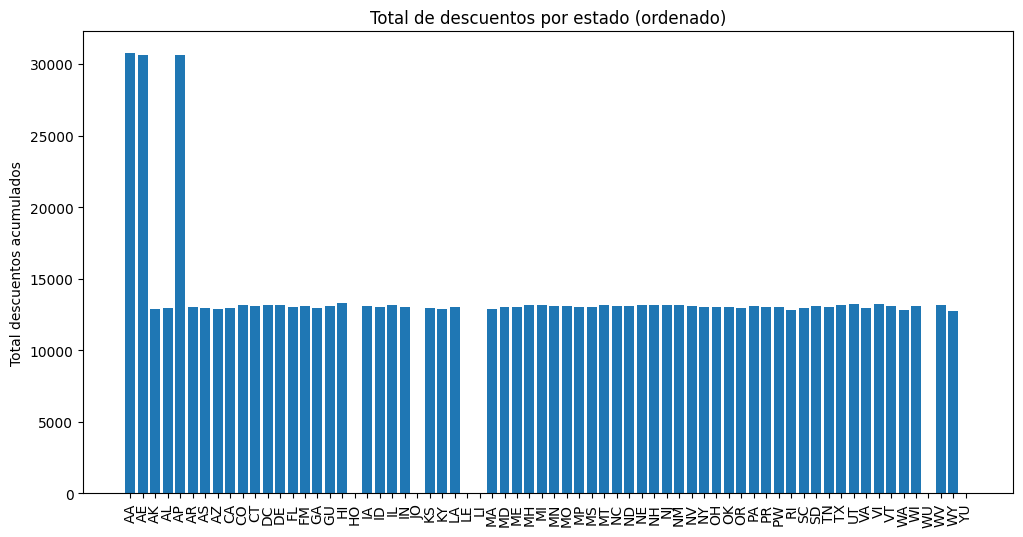

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(resumen.index, resumen['total'])
plt.xticks(rotation=90)
plt.ylabel("Total descuentos acumulados")
plt.title("Total de descuentos por estado (ordenado)")
plt.show()


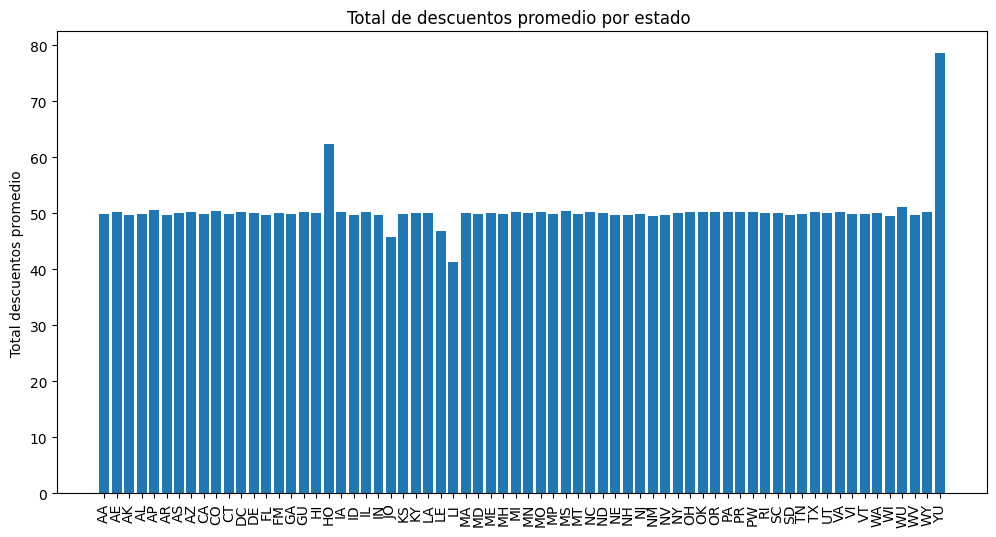

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(resumen.index, resumen['descuento_promedio'])
plt.xticks(rotation=90)
plt.ylabel("Total descuentos promedio")
plt.title("Total de descuentos promedio por estado ")
plt.show()


## Distribucion de descuentos en base al metodo de pago

Comparacion de la cantidad descuento en base al metodo de pago. Solo son tenidas en cuenta las ordenes con descuento

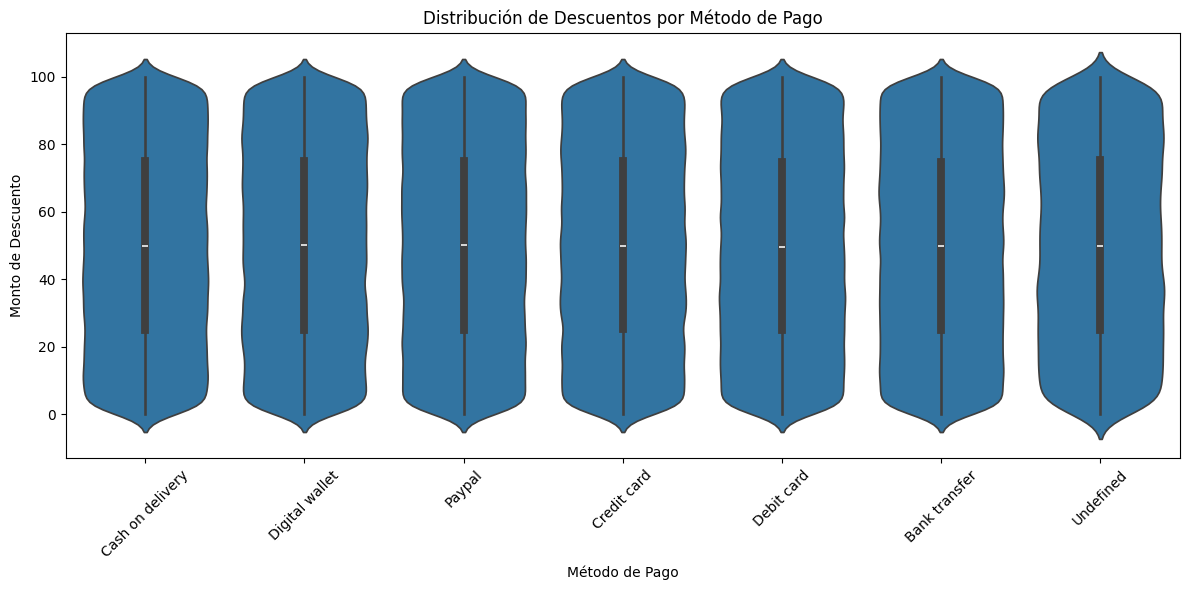

In [ ]:
df_orders = dfs['orders.pkl'].copy()
df_orders = df_orders[['order_id', 'payment_method', 'discount_amount']]
df_orders = df_orders[df_orders['discount_amount']>0]


df_orders = df_orders[['order_id', 'payment_method', 'discount_amount']]

df_orders.loc[:, 'payment_method'] = df_orders['payment_method'].str.strip().str.lower().str.capitalize()

plt.figure(figsize=(12,6))

sb.violinplot(
    data=df_orders,
    x='payment_method',
    y='discount_amount',
)

plt.xticks(rotation=45)
plt.xlabel("Método de Pago")
plt.ylabel("Monto de Descuento")
plt.title("Distribución de Descuentos por Método de Pago")
plt.tight_layout()
plt.show()

##Ordenes por mes en categorias padres

Comparacion de cantidad de ventas por mes en las top 15 categorias padres de productos. No es util, order id es distinto en order items comparado a la info de ordenes

In [ ]:
df_categorias = dfs['categories.pkl'].copy()
df_products= dfs['products.pkl'].copy()
df_orders = dfs['orders.pkl'].copy()
df_order_items = dfs['order_items.pkl'].copy()

df_orders['created_at'] = pd.to_datetime(df_orders['created_at'], format='mixed', errors='coerce')
df_orders['mes'] = df_orders['created_at'].dt.month


df_merge_categoria = df_categorias.merge(df_products, left_on='category_id', right_on='category_id')


df_merge_order=df_orders.merge(df_order_items, left_on='order_id', right_on='order_id')

df_merge_order_categoria=df_merge_order.merge(df_merge_categoria, left_on='product_id', right_on='product_id')

df_merge_order


,Unnamed: 0_x,order_id,customer_id,order_date,status,payment_method,shipping_address,billing_address,discount_amount_x,tax_amount,...,updated_at,subtotal,mes,Unnamed: 0_y,order_item_id,product_id,quantity,unit_price,line_total,discount_amount_y


##Ordenes de items por mes y estado

Ver que mes anio hay registrado

In [ ]:
df_orders = dfs['orders.pkl'].copy()

df_orders['created_at'] = pd.to_datetime(df_orders['created_at'], errors='coerce')

df_orders['mes_anio'] = df_orders['created_at'].dt.to_period('M').dt.to_timestamp()

df_orders = df_orders[['order_id', 'mes_anio', 'shipping_address']]

todos_meses = sorted(df_orders['mes_anio'].dropna().unique())

todos_meses_str = [m.strftime('%b %Y') for m in todos_meses]

print("Meses disponibles:", todos_meses_str)


Meses disponibles: ['Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023', 'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024', 'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024', 'Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025', 'May 2025', 'Jun 2025', 'Jul 2025']


Comparacion de ventas totales por mes y estado. Se tienen en cuenta solo los anios que hay datos al 100%. Se asume que en ningun momento de los meses se dejo de guardar la informacion.

In [ ]:
df_orders = dfs['orders.pkl'].copy()
df_orders = df_orders[['order_id', 'created_at', 'shipping_address']]

df_orders['created_at'] = pd.to_datetime(df_orders['created_at'], errors='coerce')
df_orders = df_orders.dropna(subset=['created_at'])

df_orders["estado"] = df_orders["shipping_address"].str.extract(r"\b([A-Z]{2})\b")
df_orders['year'] = df_orders['created_at'].dt.year
df_orders['month'] = df_orders['created_at'].dt.month

años_completos = (
    df_orders.groupby('year')['month'].nunique()
    .loc[lambda s: s == 12]
    .index
)

df_fair = df_orders[df_orders['year'].isin(años_completos)]

df_grouped = df_fair.groupby(['month', 'estado']).size().unstack(fill_value=0)

top_15_states = df_grouped.sum().sort_values(ascending=False).head(15).index
df_top15 = df_grouped[top_15_states]

df_top15.index = df_top15.index.map(lambda x: pd.Timestamp(2000, x, 1).strftime('%b'))


<Axes: xlabel='estado', ylabel='month'>

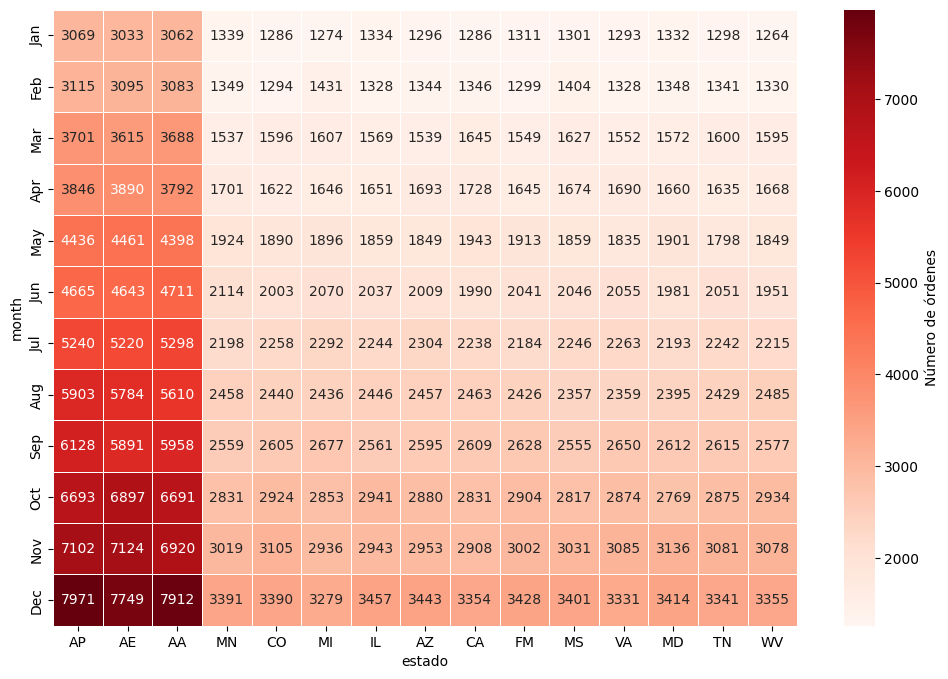

In [ ]:
plt.figure(figsize=(12, 8))
sb.heatmap(df_top15,
            annot=True,
            fmt='d',
            cmap="Reds",
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'label': 'Número de órdenes'})

## Analisis jerarquico de ordenes de items y sus categorias

Desglose de orders por categorias padre y sus categorias. IMPORTANTE: no son la cantidad de productos, sino las ordenes. Se asume que las relaciones entre las categorias padres y las categorias hijas son correctas.

In [ ]:
df_order_items = dfs['order_items.pkl'].copy()
df_products = dfs['products.pkl'].copy()
df_categorias = dfs['categories.pkl'].copy()

df_categorias.loc[:,'parent_category'] = df_categorias['parent_category'].str.strip().str.lower().str.capitalize()
df_categorias.loc[:,'category_name'] = df_categorias['category_name'].str.strip().str.lower().str.capitalize()

df_products.fillna({'category_id':'Undefined'}, inplace=True)
df_categorias.fillna({'category_id':'Undefined'}, inplace=True)
df_categorias.fillna({'parent_category':'Undefined'}, inplace=True)

df_merged = df_order_items.merge(df_products, on='product_id')

df_merged = df_merged[['category_id','order_id']].merge(
    df_categorias[['category_id','parent_category','category_name']], on='category_id'
)

df_grouped = df_merged.groupby(['parent_category','category_id','category_name']).size()
df_grouped = df_grouped.reset_index().rename(columns={0:'Ordenes totales'})


In [ ]:
fig = px.treemap(
    df_grouped,
    path=['parent_category', 'category_name'],
    values='Ordenes totales',
    color='Ordenes totales',
    hover_data={'Ordenes totales': True},
    color_continuous_scale='Reds'
)

fig.update_layout(
    title="Treemap jerárquico: Categoria padre → Categoria",
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

##Ordenes en base a su estado y el medio de pago

Comparativa con stacked bar plot de tipos de pagos y estado de orden

In [ ]:
df_orders=dfs['orders.pkl'].copy()

df_orders = df_orders[['order_id', 'payment_method', 'status']]

df_orders.loc[:, 'payment_method'] = df_orders['payment_method'].str.strip().str.lower().str.capitalize()
df_orders.loc[:, 'status'] = df_orders['status'].str.strip().str.lower().str.capitalize()

df_orders.fillna('Undefined', inplace=True)

df_orders_grouped = df_orders.pivot_table(
    index="payment_method",
    columns="status",
    values="order_id",
    aggfunc="count",
    fill_value=0
)


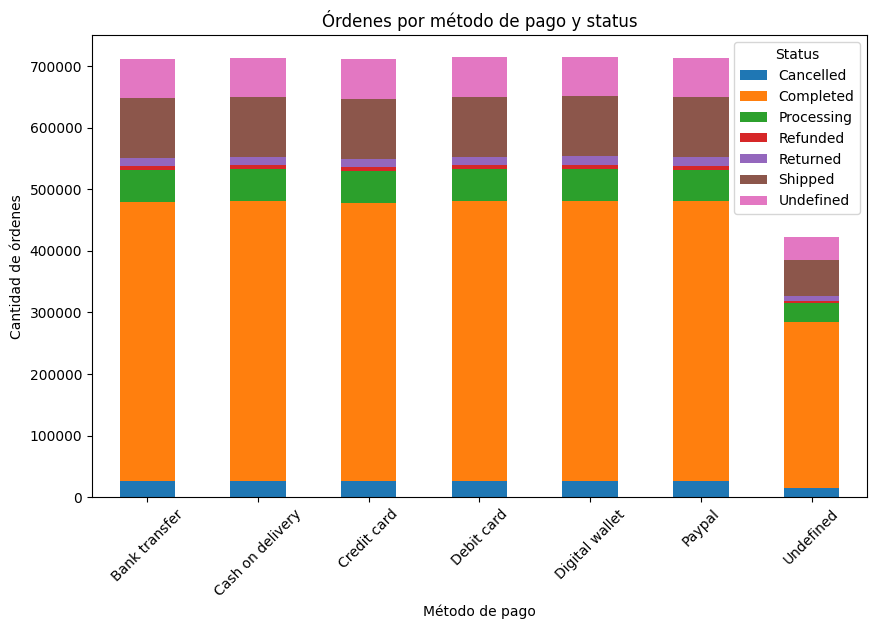

In [ ]:
df_orders_grouped.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Órdenes por método de pago y status")
plt.ylabel("Cantidad de órdenes")
plt.xlabel("Método de pago")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.show()

# Clientes y pago

##Ordenes devueltas y codigos postales

Analisis de ordenes que se hayan devuelto. Se busca los 5 codigos postales los cuales hayan tenido mas devoluciones. Ademas se bucan el cliente con mas devoluciones en esos codigos postales. Se toman en cuenta las shipping address las cuales contienen 5 numeros consecutivos. 3123 Alan Extension Port Andrea, MA 26926

In [ ]:
df = dfs["orders.pkl"].copy()
df_clientes = dfs["customers.pkl"].copy()

refund_df = df[df["status"] == "Refunded"].copy()

refund_df["codigo_postal"] = (
    refund_df["shipping_address"]
    .str.split(",").str[1]
    .str.strip()
    .str.split().str[-1]
)

top_5_codigos = refund_df["codigo_postal"].value_counts().head(5)

refund_top5 = refund_df[refund_df["codigo_postal"].isin(top_5_codigos.index)]

clientes_frecuentes = refund_top5["customer_id"].mode()[0]

nombre_cliente = df_clientes.loc[df_clientes["customer_id"] == clientes_frecuentes, "first_name"].values[0]

print("Top 5 códigos postales con más reembolsos:")
print(top_5_codigos)
print(f"\nEl nombre más frecuente entre clientes de esas direcciones es: {nombre_cliente}")

Index(['70696', '76449', '59883', '71463', '90226'], dtype='object', name='codigo_postal')
Top 5 códigos postales con más reembolsos:
codigo_postal
70696    6
76449    4
59883    4
71463    4
90226    4
Name: count, dtype: int64

El nombre más frecuente entre clientes de esas direcciones es: Ashley


##Metodos de pago y segmento de cliente

Para cada tipo de pago y segmento de cliente, muestra la suma y el promedio expresado como porcentaje, de clientes activos y de consentimiento de marketing. Se tienen en cuentaa los nana y los undefined en todas las combinaciones pues aun es informacion util

In [ ]:
df_orders = dfs['orders.pkl'].copy()
df_customers = dfs['customers.pkl'].copy()

df_orders = df_orders[['customer_id', 'payment_method']]
df_customers = df_customers[['customer_id', 'customer_segment', 'marketing_consent','is_active']]

df_orders['payment_method'] = df_orders['payment_method'].fillna('no definido')
df_customers['customer_segment']= df_customers['customer_segment'].fillna('no definido')

df_customers['customer_segment'] = df_customers['customer_segment'].replace('undefined', 'No definido')
df_orders['payment_method'] = df_orders['payment_method'].replace('undefined', 'No definido')

df_orders['payment_method'] = df_orders['payment_method'].str.strip().str.lower().str.capitalize()
df_customers['customer_segment'] = df_customers['customer_segment'].str.strip().str.lower().str.capitalize()



df = df_orders.merge(df_customers, on='customer_id')


resumen = df.groupby(['payment_method', 'customer_segment']).agg(
    total_clientes_activos=('is_active', 'sum'),
    total_clientes_marketing=('marketing_consent', 'sum'),
    cantidad_total_clientes=('customer_id', 'count')
).reset_index()

traduccion_pago = {
    'Bank transfer': 'Transferencia bancaria',
    'Cash on delivery': 'Efectivo en entrega',
    'Credit card': 'Tarjeta de crédito',
    'Digital waller' : 'Billetera virtual',

}

resumen['payment_method'] = resumen['payment_method'].replace(traduccion_pago)

resumen['porcentaje_clientes_activos'] = (resumen['total_clientes_activos'] / resumen['cantidad_total_clientes'] * 100).round(2)
resumen['porcentaje_clientes_marketing'] = (resumen['total_clientes_marketing'] / resumen['cantidad_total_clientes'] * 100).round(2)

resumen = resumen.rename(columns={
    'payment_method': 'Tipo de pago',
    'customer_segment': 'Segmento de cliente',
    'total_clientes_activos': 'Clientes activos (total)',
    'total_clientes_marketing': 'Clientes con consentimiento marketing (total)',
    'cantidad_total_clientes': 'Total de clientes',
    'porcentaje_clientes_activos': 'Clientes activos (%)',
    'porcentaje_clientes_marketing': 'Clientes con consentimiento marketing (%)'
})

print(resumen.to_string())




              Tipo de pago Segmento de cliente  Clientes activos (total)  Clientes con consentimiento marketing (total)  Total de clientes  Clientes activos (%)  Clientes con consentimiento marketing (%)
0   Transferencia bancaria              Budget                    114885                                          89153             127753                 89.93                                      69.79
1   Transferencia bancaria         No definido                     58775                                          45603              65325                 89.97                                      69.81
2   Transferencia bancaria             Premium                    116360                                          90546             129544                 89.82                                      69.90
3   Transferencia bancaria             Regular                    350102                                         273106             389287                 89.93                        

##Distribucion de tiempo de compras de clientes

Comparacion entre tiempos de compra promedios de los clientes. Cualquier orden sin fecha de orden queda descartada para el analisis asi como las ordenes que no tengan un cliente asociado

In [ ]:
df_orders = dfs['orders.pkl'].copy()
df_orders = df_orders[['order_id','order_date','customer_id']].dropna()
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'],errors='coerce')

df_orders = df_orders.sort_values(['customer_id', 'order_date'])
df_orders['days_between'] = df_orders.groupby('customer_id')['order_date'].diff().dt.days

df_summary = df_orders.groupby('customer_id').agg({
    'order_id': 'count',
    'days_between': 'mean'
}).round(1).reset_index()

df_summary.columns = ['customer_id', 'order_count', 'avg_days_between']

def classify_detailed(row):
    order_count = row['order_count']
    avg_days = row['avg_days_between']

    if order_count == 1:
        return 'Una sola compra'
    elif pd.isna(avg_days):
        return 'Sin datos válidos'
    elif avg_days == 0:
        return 'Mismo día (0 días)'
    elif avg_days <= 10:
        return 'Muy frecuente (1-10 días)'
    elif avg_days <= 20:
        return 'Frecuente (11-20 días)'
    elif avg_days <= 30:
        return 'Regular (21-30 días)'
    elif avg_days <= 40:
        return 'Ocasional (31-40 días)'
    elif avg_days <= 50:
        return 'Ocasional (41-50 días)'
    elif avg_days <= 60:
        return 'Poco frecuente (51-60 días)'
    return 'Muy esporádico (>60 días)'

df_summary['segment'] = df_summary.apply(classify_detailed, axis=1)

results = df_summary['segment'].value_counts()
for segment, count in results.items():
    pct = (count / len(df_summary)) * 100
    print(f"{segment}: {count:,} ({pct:.1f}%)")

recurring = df_summary[df_summary['order_count'] > 1]['avg_days_between']
print(f"\nRecurrentes - Promedio: {recurring.mean():.1f}, Mediana: {recurring.median():.1f}")

Muy frecuente (1-10 días): 37,997 (38.0%)
Frecuente (11-20 días): 37,387 (37.4%)
Regular (21-30 días): 21,273 (21.3%)
Ocasional (31-40 días): 1,994 (2.0%)
Mismo día (0 días): 1,235 (1.2%)
Ocasional (41-50 días): 104 (0.1%)
Poco frecuente (51-60 días): 2 (0.0%)

Recurrentes - Promedio: 13.3, Mediana: 12.9


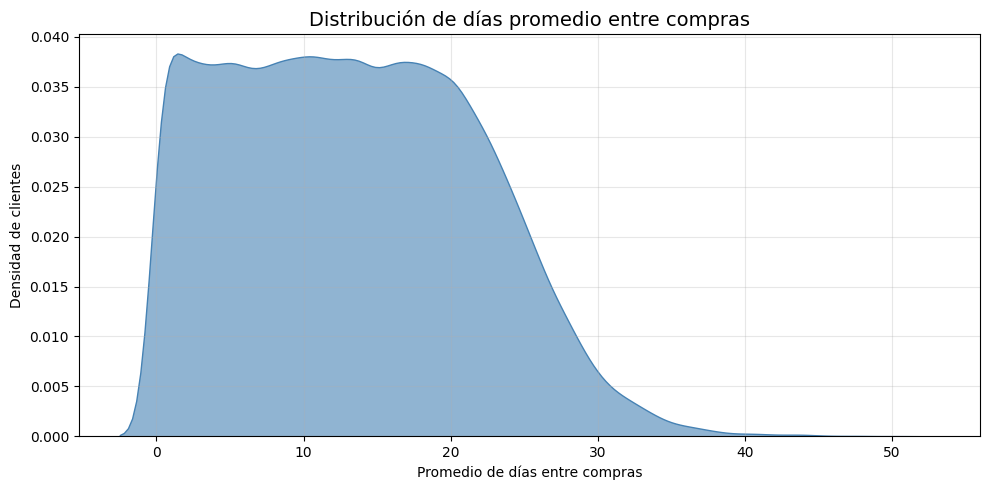

In [ ]:
plt.figure(figsize=(10,5))
sb.kdeplot(df_summary["avg_days_between"], fill=True, color="steelblue", alpha=0.6)
plt.title("Distribución de días promedio entre compras", fontsize=14)
plt.xlabel("Promedio de días entre compras")
plt.ylabel("Densidad de clientes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Productos y reviews

##Productos con stuff en la descripcion

Para los productos que contienen en su descripción la palabra “stuff” (sin importar mayúsculas o minúsculas), calcular el peso total de su inventario agrupado por marca, mostrar sólo la marca y el peso total de las 5 más pesadas. Se rellenan el peso y el stock con 0 si es que hay un nan para no generar datos enganiosos



In [ ]:
df_products = dfs['products.pkl'].copy()

df_stuff = df_products[df_products['description'].str.contains('stuff', case=False, na=False)].copy()
print(f"Total de productos con 'stuff' en la descripción: {len(df_stuff):,}")

df_stuff.loc[:, 'weight_kg'] = df_stuff['weight_kg'].fillna(0)
df_stuff.loc[:, 'stock_quantity'] = df_stuff['stock_quantity'].fillna(0)

df_stuff.loc[:, 'brand'] = df_stuff['brand'].fillna("Desconocida")
df_stuff.loc[:, 'brand'] = df_stuff['brand'].replace(["undefined", "Undefined"], "Desconocida")

df_stuff = df_stuff[df_stuff['brand'] != "Desconocida"].copy()

df_stuff.loc[:, 'peso_total'] = df_stuff['weight_kg'] * df_stuff['stock_quantity']

top_5_pesadas = df_stuff.groupby('brand')['peso_total'].sum().nlargest(5)

top_5_pesadas_df = top_5_pesadas.reset_index().rename(columns={
    'brand': 'Marca',
    'peso_total': 'Peso total'
})

print(top_5_pesadas_df)


Total de productos con 'stuff' en la descripción: 14,605
     Marca  Peso total
0       3M  2037214.18
1   Adidas  1783357.68
2  Wayfair  1508354.30
3   Hasbro  1420969.47
4     Nike  1408352.56


##Reviews a lo largo del tiempo

Promedio de reviews en base al tiempo. Cualquier review sin fecha registrada no es tenida en cuenta

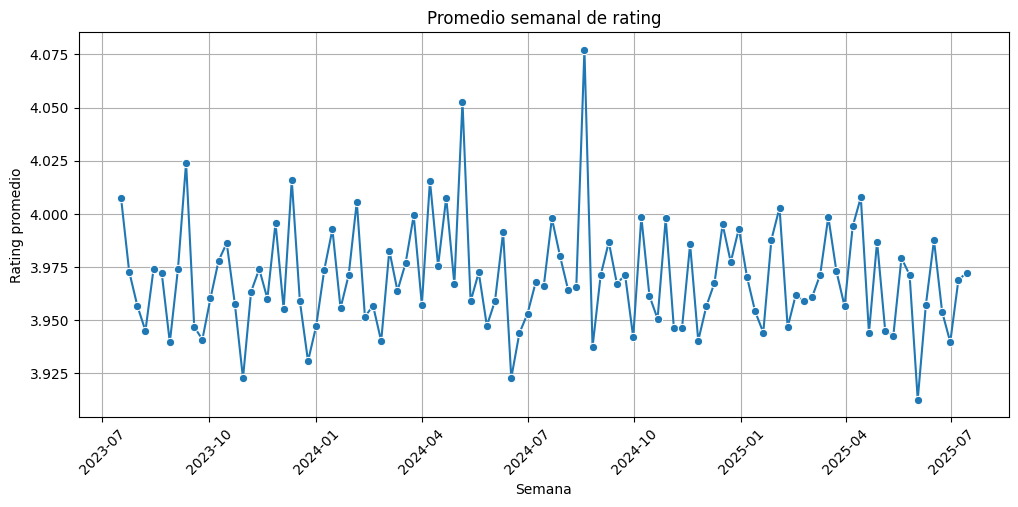

In [ ]:
df_reviews=dfs['reviews.pkl'].copy()

df_reviews['created_at'] = pd.to_datetime(df_reviews['created_at'],errors='coerce')

df_reviews = df_reviews.dropna(subset=['created_at'])

df_reviews['review_week'] = df_reviews['created_at'].dt.to_period('W').apply(lambda r: r.start_time)

df_reviews=df_reviews[['review_id','review_week','rating']]

df_reviews=df_reviews.groupby(['review_week']).agg({'rating':'mean'}).reset_index()

plt.figure(figsize=(12,5))
sb.lineplot(data=df_reviews, x='review_week', y='rating', marker='o')
plt.xticks(rotation=45)
plt.title("Promedio semanal de rating")
plt.ylabel("Rating promedio")
plt.xlabel("Semana")
plt.grid(True)

# Descomentar para verlo mas general
#plt.ylim(0, 5)

plt.show()

##Distribucion de rating

Se busca analizar el rating. Se cuentan la cantidad de reviews que hay para poder separar el rating y ver el las resenias en general

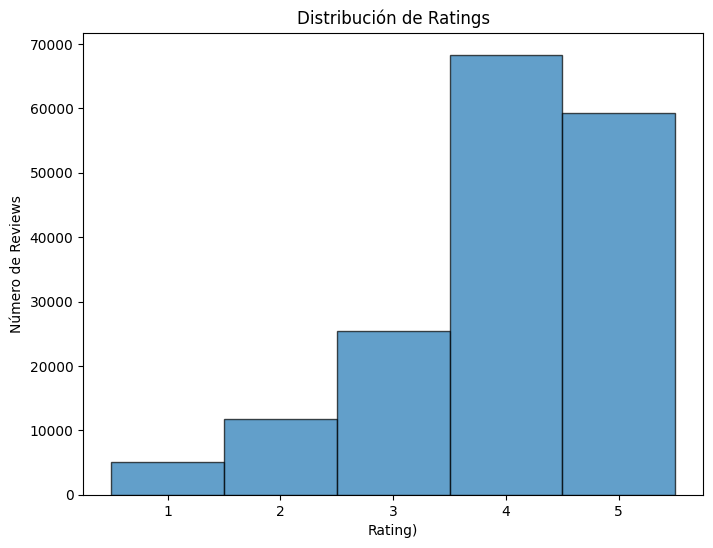

Total reviews: 170,000
Rating promedio: 3.97★


In [ ]:
df_reviews = dfs['reviews.pkl'].copy()
df_reviews = df_reviews[['product_id','rating']]
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')
df_reviews = df_reviews.dropna(subset=['rating'])

plt.figure(figsize=(8, 6))
plt.hist(df_reviews['rating'],
         bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
         edgecolor='black',
         alpha=0.7)
plt.xlabel('Rating)')
plt.ylabel('Número de Reviews')
plt.title('Distribución de Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

print(f"Total reviews: {len(df_reviews):,}")
print(f"Rating promedio: {df_reviews['rating'].mean():.2f}★")

##Palabras mas utilizadas en las reviews

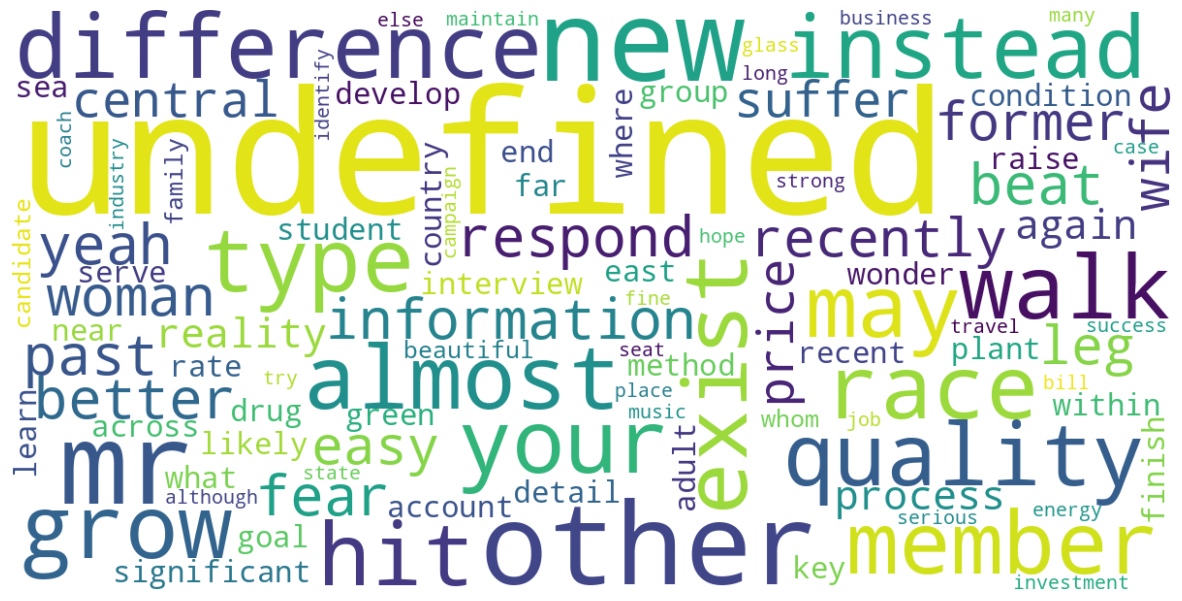

In [ ]:
from wordcloud import WordCloud

df_reviews = dfs['reviews.pkl'].copy()

texto_completo = ' '.join(df_reviews['title'].fillna('').astype(str))
#descomentar la proxima linea para ver la nube con los comentarios en vez de los titulos y comentar la anterior
#texto_completo = ' '.join(df_reviews['comment'].fillna('').astype(str))

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    colormap='viridis',
    stopwords=set(['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by','a','it'])
).generate(texto_completo.lower())

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

# Inventario y rentabilidad

## Robos y roturas en el inventario

Se analiza la cantidad de incidentes ocacionadas por danios o por robos a lo largo de los registros del inventario. Ademas se se separa en categorias padres para ver si

In [ ]:
df_logs = dfs['inventory_logs.pkl'].copy()
df_products = dfs['products.pkl'].copy()
df_categorias = dfs['categories.pkl'].copy()

df_logs['movement_type'] = df_logs['movement_type'].str.upper().str.strip()
df_logs['reason'] = df_logs['reason'].fillna('undefined').str.lower().str.strip()
df_logs['quantity_change'] = pd.to_numeric(df_logs['quantity_change'], errors='coerce')

df_categorias['parent_category'] = df_categorias['parent_category'].fillna('Undefined').str.strip().str.lower().str.capitalize()
df_categorias['category_name'] =df_categorias['category_name'].fillna('Undefined').str.strip().str.lower().str.capitalize()

theft_damage = df_logs[df_logs['reason'].isin(['theft', 'damage'])].copy()
print(f"Total incidentes de theft/damage: {len(theft_damage):,}")

df_theft_analysis = (
    theft_damage
    .merge(df_products[['product_id', 'category_id']], on='product_id')
    .merge(df_categorias[['category_id', 'category_name', 'parent_category']], on='category_id')
)


print("\n=== INCIDENTES POR CATEGORÍA PADRE TOP 10 ===")

parent_summary = df_theft_analysis.groupby(['parent_category', 'reason']).agg({
    'quantity_change': 'count',  # Solo incidentes
    'product_id': 'nunique'
}).round(2)

parent_summary.columns = ['incidents', 'products_affected']
parent_summary = parent_summary.reset_index()

parent_pivot = parent_summary.pivot_table(
    index='parent_category',
    columns='reason',
    values='incidents',
    fill_value=0
).sort_values(['theft', 'damage'], ascending=False)

print(parent_pivot.head(10))

# Resumen final
theft_incidents = parent_summary[parent_summary['reason'] == 'theft']['incidents'].sum()
damage_incidents = parent_summary[parent_summary['reason'] == 'damage']['incidents'].sum()
theft_categories = parent_summary[parent_summary['reason'] == 'theft']['parent_category'].nunique()
damage_categories = parent_summary[parent_summary['reason'] == 'damage']['parent_category'].nunique()

print(f"\n=== RESUMEN ===")
print(f"Total incidentes de robo: {theft_incidents}")
print(f"Total incidentes de daño: {damage_incidents}")
print(f"Total incidentes: {theft_incidents + damage_incidents}")
print(f"Categorías padre afectadas por robos: {theft_categories}")
print(f"Categorías padre afectadas por daños: {damage_categories}")

Total incidentes de theft/damage: 103,921

=== INCIDENTES POR CATEGORÍA PADRE TOP 10 ===
reason                   damage   theft
parent_category                        
Undefined                4548.0  4459.0
Furniture                2006.0  1984.0
Kitchen & dining         1719.0  1673.0
Grocery & gourmet food   1497.0  1557.0
Tools & hardware         1392.0  1553.0
Games & virtual goods    1511.0  1536.0
Shoes                    1470.0  1533.0
Industrial & scientific  1531.0  1518.0
Music & movies           1502.0  1488.0
Pet care                 1460.0  1487.0

=== RESUMEN ===
Total incidentes de robo: 44147
Total incidentes de daño: 44071
Total incidentes: 88218
Categorías padre afectadas por robos: 31
Categorías padre afectadas por daños: 31


In [ ]:
df_logs = dfs['inventory_logs.pkl'].copy()
df_products = dfs['products.pkl'].copy()

df_merge=df_logs.merge(df_products,on='product_id')


df_merge = df_logs[df_logs['reason'].isin(['theft', 'damage'])]

df_merge=df_merge[['product_id','log_id']]

df_merge=df_merge.groupby('product_id').agg(
    total= ('log_id','count')
)

df_merge.nlargest(1,'total')

,total
product_id,
942077,3


##Profit por categoria padre

Comparacion porcentual de ganancia por cada producto agrupado por categoria padre


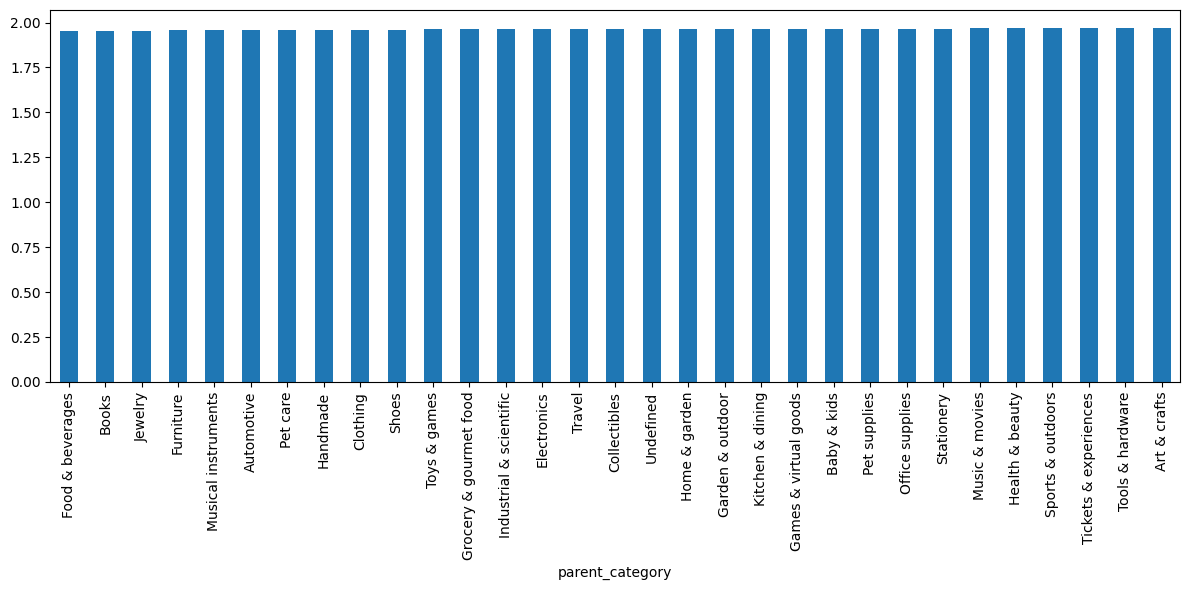

In [ ]:
df_products = dfs['products.pkl'].copy()
df_categorias = dfs['categories.pkl'].copy()

df_products = df_products[['product_id','category_id','price','cost']]
df_products = df_products.dropna()

df_categorias['parent_category'] = df_categorias['parent_category'].fillna('Undefined').str.strip().str.lower().str.capitalize()

df_merge = df_products.merge(df_categorias, left_on='category_id', right_on='category_id')
df_merge['profit_multiplier'] = df_merge['price'] / df_merge['cost']
df_merge = df_merge[['product_id','parent_category','profit_multiplier']]
df_merge = df_merge.groupby(['parent_category']).agg({'profit_multiplier':'mean'}).reset_index()

df_merge.sort_values('profit_multiplier').plot(x='parent_category', y='profit_multiplier', kind='bar', figsize=(12, 6), legend=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Dividiendo los ingresos en los costos y las ganancias

In [ ]:

df_order_items = dfs['order_items.pkl'].copy()
df_products = dfs['products.pkl'].copy()
df_categories = dfs['categories.pkl'].copy()

df_merged = df_order_items.merge(
    df_products[['product_id', 'category_id', 'cost']],
    on='product_id'
).merge(
    df_categories[['category_id', 'category_name', 'parent_category']],
    on='category_id'
)

df_merged.dropna(subset=['line_total','cost','quantity'],inplace=True)

df_merged['revenue'] = df_merged['line_total']
df_merged['total_cost'] = df_merged['cost'] * df_merged['quantity']
df_merged['profit'] = df_merged['revenue'] - df_merged['total_cost']

df_merged['parent_category']=df_merged['parent_category'].str.strip().str.lower().str.capitalize()
df_merged['parent_category'].fillna('Undefined', inplace=True)

parent_summary = df_merged.groupby('parent_category').agg({
    'revenue': 'sum',
    'total_cost': 'sum',
    'profit': 'sum'
}).reset_index()

top_parents = parent_summary['parent_category'].tolist()

labels = []
sources = []
targets = []
values = []

# Nodos: Ingresos → Categorías Padre → Costos/Ganancias
labels.extend(['INGRESOS'])
labels.extend([f'{parent}' for parent in top_parents])
labels.extend(['COSTOS TOTALES', 'GANANCIA NETA'])

# Flujos: Ingresos → TODAS las Categorías Padre
for i, parent in enumerate(top_parents):
    revenue = parent_summary[parent_summary['parent_category'] == parent]['revenue'].iloc[0]
    sources.append(0)  # Desde INGRESOS
    targets.append(i + 1)  # Hacia categoría padre
    values.append(revenue)

# Flujos: TODAS las Categorías Padre → Costos
total_costs_idx = len(labels) - 2
for i, parent in enumerate(top_parents):
    cost = parent_summary[parent_summary['parent_category'] == parent]['total_cost'].iloc[0]
    sources.append(i + 1)  # Desde categoría padre
    targets.append(total_costs_idx)  # Hacia COSTOS
    values.append(cost)

# Flujos: TODAS las Categorías Padre → Ganancias
profit_idx = len(labels) - 1
for i, parent in enumerate(top_parents):
    profit = parent_summary[parent_summary['parent_category'] == parent]['profit'].iloc[0]
    if profit > 0:  # Solo mostrar ganancias positivas
        sources.append(i + 1)  # Desde categoría padre
        targets.append(profit_idx)  # Hacia GANANCIA
        values.append(profit)

category_colors = (px.colors.qualitative.Set1 + px.colors.qualitative.Set2 +
                  px.colors.qualitative.Set3 + px.colors.qualitative.Pastel1)[:len(top_parents)]

node_colors = (
    ['#1f77b4'] +  # Ingresos (azul)
    category_colors +  # Categorías con colores distintos
    ['#ff4444', '#00aa00']  # Costos (rojo), Ganancia (verde)
)

link_colors = []
for s, t in zip(sources, targets):
    if t == total_costs_idx:  # Hacia costos
        link_colors.append('rgba(255,68,68,0.4)')
    elif t == profit_idx:  # Hacia ganancia
        link_colors.append('rgba(0,170,0,0.4)')
    else:  # Hacia categorías
        link_colors.append('rgba(31,119,180,0.4)')

# Crear Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=25,
        line=dict(color="black", width=0.8),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Flujo de Dinero: Ingresos → Todas las Categorías → Costos/Ganancias",
    font_size=10,
    width=1400,
    height=900
)

fig.show()

/tmp/ipython-input-3944772421.py:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



